HOW TO USE:

Must run the first section to import data and necessary libraries. Then can run subsequent sections to show various data and charts, or runall to show all charts.

In [1]:
'''
Run this section to import libraries and load calibration data from the filepath below
'''
import matplotlib.pyplot as plt
import pandas
import math

all_calib_df = pandas.read_csv('../data/20251209_PP3_QuickStrip-HTS-96-CalibrationHistory.csv', skipinitialspace=True)
last_daily_calib_df = all_calib_df.groupby('Date').last().reset_index() #make sorted data frame of last calibration for the day
value_cols = all_calib_df.columns.tolist()[2:] #list of cols but remove date and time

UpperLeft X (mm)         2.093
UpperRight X (mm)        1.953
LowerLeft X (mm)         1.600
LowerRight X (mm)        1.359
BarcodeReader X (mm)     7.985
RackPickup X (mm)        4.874
RackPlace X (mm)         2.001
RackTrayOffset X (mm)    0.500
dtype: float64


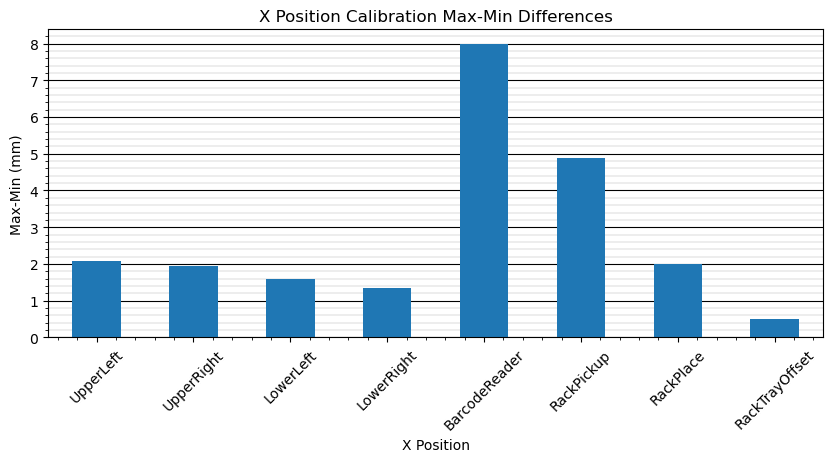

UpperLeft Z (mm)          9.501
UpperRight Z (mm)        10.167
LowerLeft Z (mm)          9.104
LowerRight Z (mm)         9.762
BarcodeReader Z (mm)     23.006
RackPickup Z (mm)         4.174
RackPlace Z (mm)          0.015
RackTrayOffset Z (mm)     0.000
dtype: float64


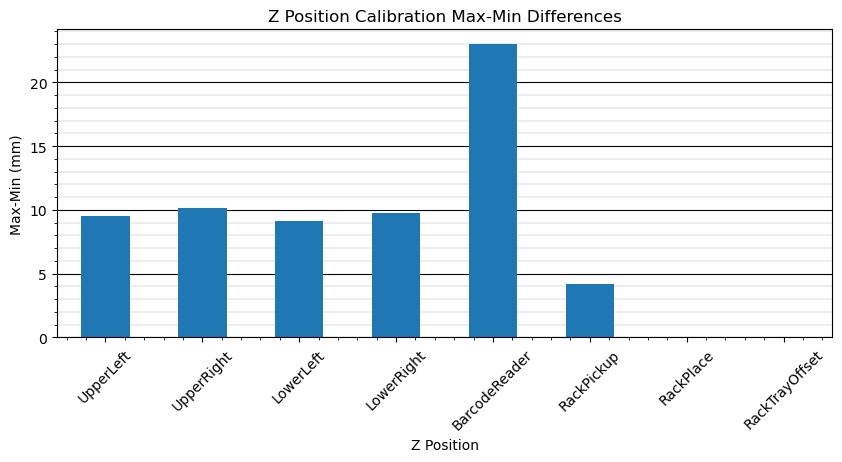

UpperLeft Orientation (deg)         2.701
UpperRight Orientation (deg)        2.862
LowerLeft Orientation (deg)         2.404
LowerRight Orientation (deg)        2.537
BarcodeReader Orientation (deg)     1.362
RackPickup Orientation (deg)        1.192
RackPlace Orientation (deg)         1.101
RackTrayOffset Orientation (deg)    0.000
dtype: float64


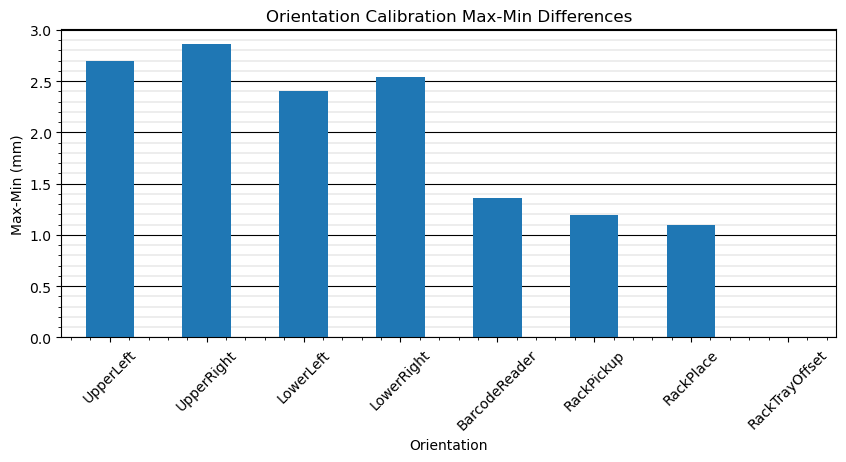

In [2]:
'''
Run this section to plot/show the differences between max and min calibration values for X/Z/Orientation of last 
daily calibrations
'''
difference_series = last_daily_calib_df[value_cols].max() - last_daily_calib_df[value_cols].min()
labels = ['X Position', 'Z Position', 'Orientation']
for i in range(3):
    axis_differences = difference_series[i::3]
    print(axis_differences)
    renamed_series = axis_differences.rename(index=lambda name: name.split(' ')[0])
    renamed_series.plot(kind='bar', 
                        figsize=(10,4),
                        title=f'{labels[i]} Calibration Max-Min Differences', 
                        xlabel=f'{labels[i]}', 
                        ylabel='Max-Min (mm)',
                        zorder=2)
    plt.minorticks_on()
    plt.grid(axis='y', which='minor', linestyle='-', linewidth='0.2', color='gray')
    plt.grid(axis='y', color='black', zorder=0)
    plt.xticks(rotation=45)
    plt.show()

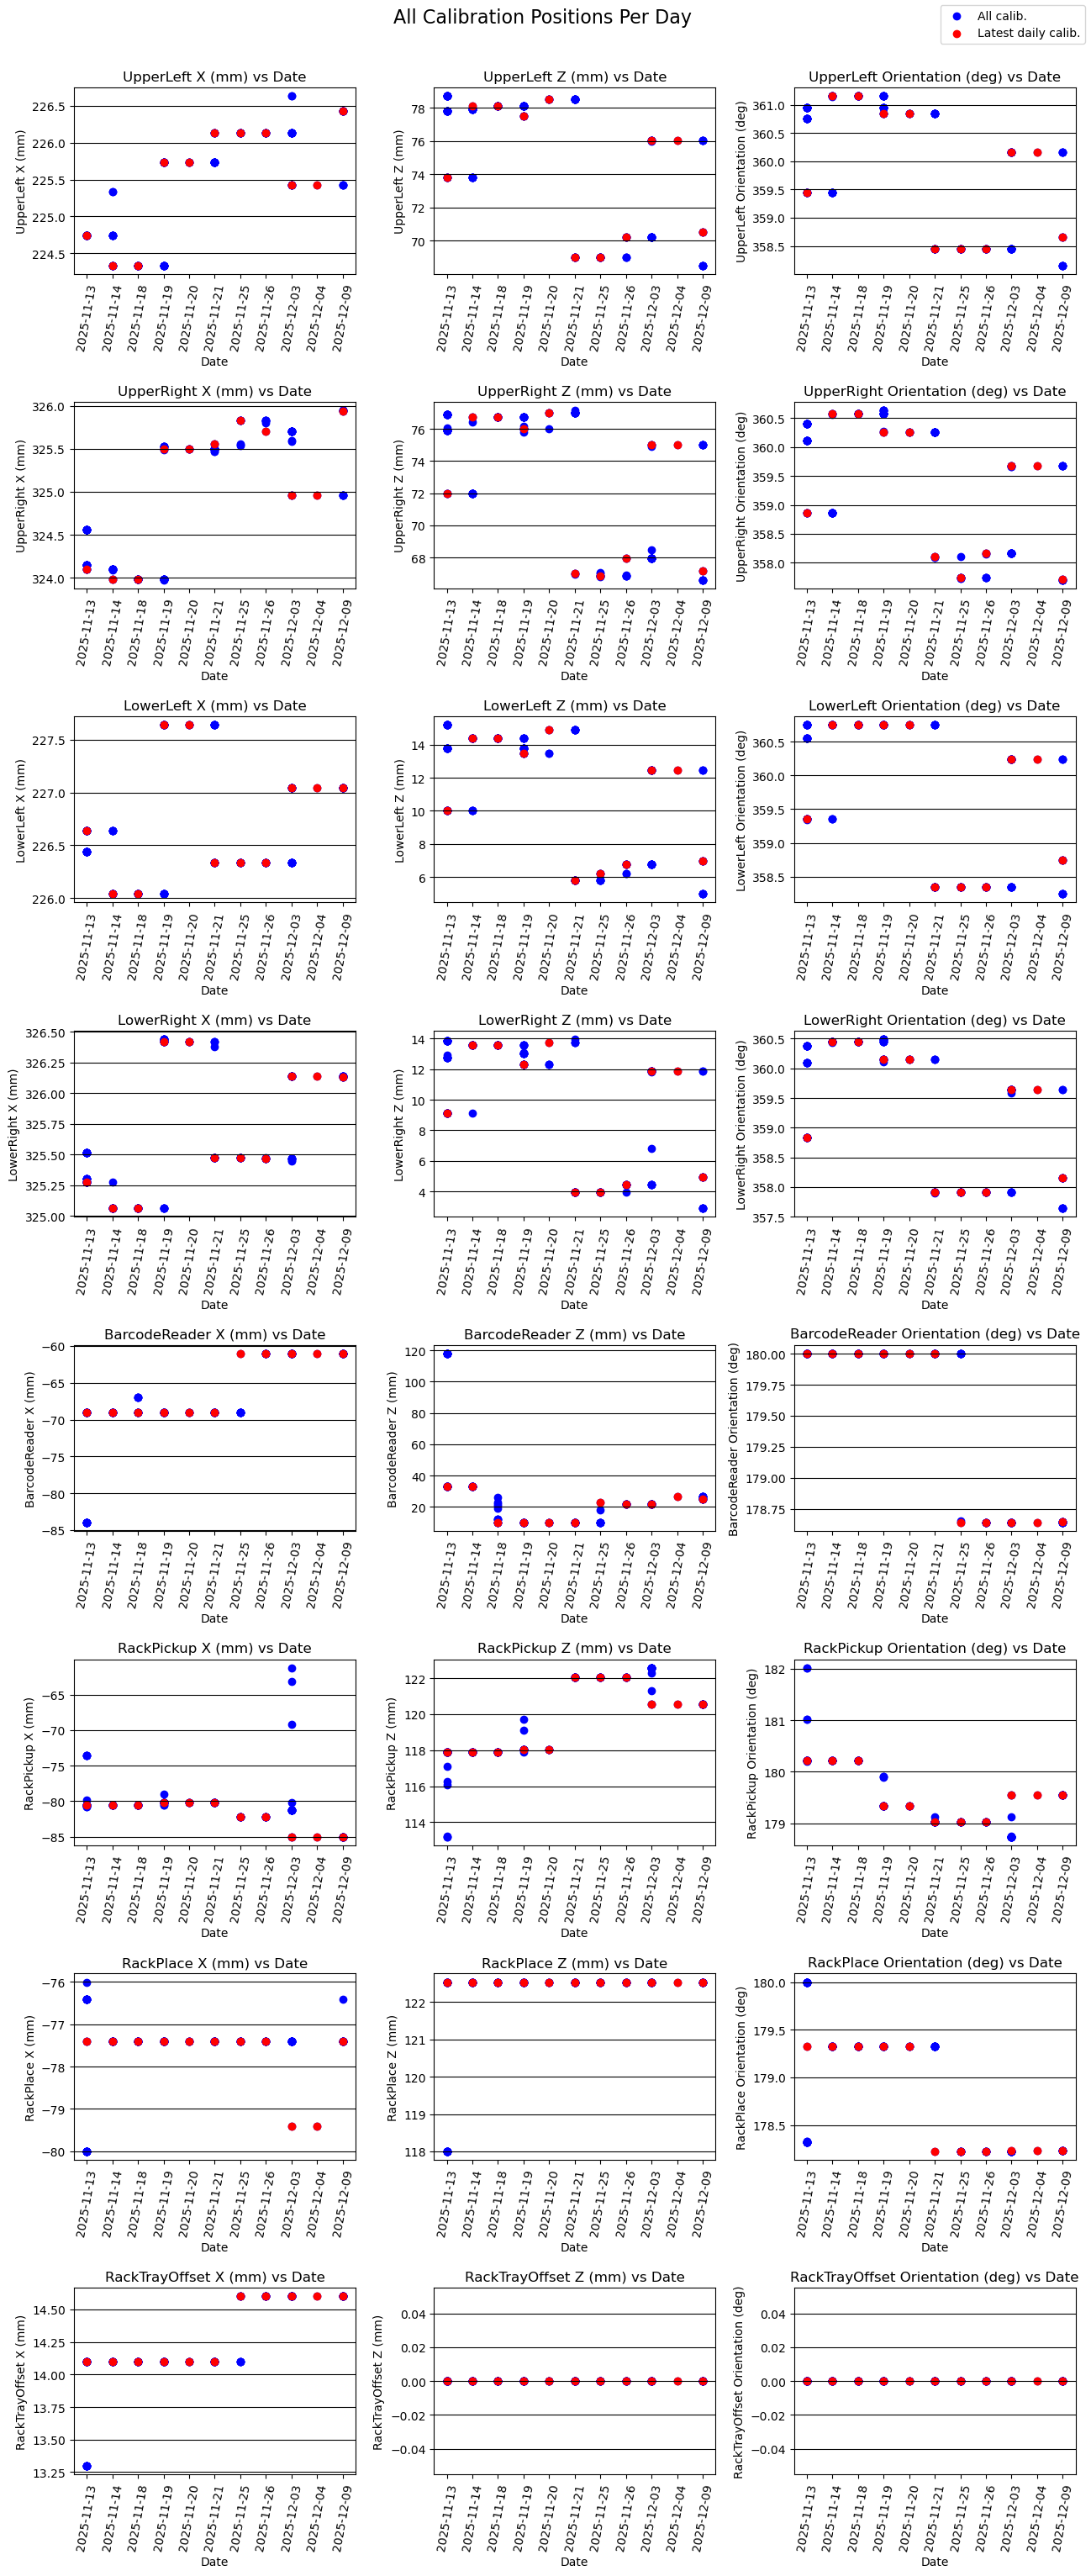

In [3]:
'''
Run this section to plot all the calibration positions per date. 
You can turn on and off what to plot by setting the following statements true/false
Blue represents all the calibrations saved for the day and red represents the last save of the day.
'''
plot_all_calibrations_per_day = True
plot_last_calibration_per_day = True

subplot_rows = int((all_calib_df.shape[1] - 2) / 3)
subplot_cols = 3
fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(13, 30))

for i in range(len(value_cols)):
    x_idx = math.floor(i / subplot_cols)
    y_idx = i % subplot_cols
    
    x = all_calib_df['Date']
    y = all_calib_df[value_cols[i]]
    last_x = last_daily_calib_df['Date']
    last_y = last_daily_calib_df[value_cols[i]]
    if plot_all_calibrations_per_day:
        ax[x_idx,y_idx].scatter(x, y, color='blue')
    if plot_last_calibration_per_day:
        ax[x_idx,y_idx].scatter(last_x, last_y, color='red')
    ax[x_idx,y_idx].set_title(f"{y.name} vs {x.name}")
    ax[x_idx,y_idx].set_xlabel(x.name)
    ax[x_idx,y_idx].set_ylabel(y.name)
    ax[x_idx,y_idx].tick_params('x', labelrotation=80)
    ax[x_idx,y_idx].grid(axis='y', color='black')

fig.legend(['All calib.', 'Latest daily calib.'], loc="upper right")
fig.tight_layout(h_pad=1.5)
plt.suptitle("All Calibration Positions Per Day", fontsize=16, y=1.02)
plt.show()